# Email Spam Detection

In [26]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
spam_df=pd.read_csv(r"spam.csv",header=0)
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
#Checking for null values
spam_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
#Shape of the dataset
spam_df.shape

(5572, 2)

In [6]:
spam_df['Category']=spam_df['Category'].replace({'spam':'1','ham':'0'})
spam_df['Category']=spam_df['Category'].astype(int)

In [7]:
spam_df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [9]:
#Identifying Independent and Target variables
y=spam_df['Category']
x=spam_df['Message']

In [10]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [11]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

In [12]:
#count the target var by 0 or 1
#and their (>=10:1 then it is imbalanced datset)
Target_count=spam_df['Category'].value_counts()
print(Target_count)
print('Class 0:',Target_count[0])
print('Class 1:',Target_count[1])
print('Proportion:',round(Target_count[0]/Target_count[1],2),':1')
print('Total email records:',len(spam_df))  #balanced dataset

0    4825
1     747
Name: Category, dtype: int64
Class 0: 4825
Class 1: 747
Proportion: 6.46 :1
Total email records: 5572


# Splitting the data

In [13]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [14]:
y_test

3245    0
944     0
1044    0
2484    0
812     0
       ..
668     0
218     0
5536    0
1657    0
3875    0
Name: Category, Length: 1393, dtype: int32

# Count Vectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)

In [16]:
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Naive Bayes-Multinomial Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
modelMNB=MultinomialNB()
modelMNB.fit(x_train_count,y_train)

MultinomialNB()

In [18]:
emails=[
    "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
    "You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99"
]
emails_count=v.transform(emails)
modelMNB.predict(emails_count)

array([0, 1])

In [19]:
x_test_count=v.transform(x_test)
modelMNB.score(x_test_count,y_test)

0.9885139985642498

In [20]:
y_pred=modelMNB.predict(x_test_count)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion matrix : 
 [[ 174   12]
 [   4 1203]]
Outcome values : 
 174 12 4 1203
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.94      0.96       186
           0       0.99      1.00      0.99      1207

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

Accuracy : 98.9 %
Precision : 97.8 %
Recall : 93.5 %
F1 Score : 0.956
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 96.6 %
MCC : 0.95
roc_auc_score: 0.966


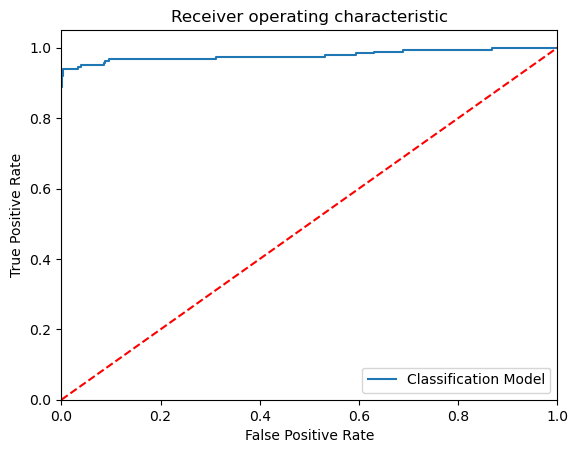

In [28]:
# Training the Naive Bayes model (MultinomialNB) on the Training set

from sklearn.naive_bayes import MultinomialNB

modelMNB = MultinomialNB(fit_prior=True,class_prior=None)

# Fit the model with train data

modelMNB.fit(x_train_count,y_train)

# Predict the model with test data set

y_pred = modelMNB.predict(x_test_count)
y_pred_prob = modelMNB.predict_proba(x_test_count)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelMNB.predict_proba(x_test_count)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

In [31]:
Results = pd.DataFrame({'Spam_A':y_test, 'Spam_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = spam_df.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)


,Category,Message,Spam_A,Spam_P
4844,0,I need details about that online job.,0,0
2997,0,They released vday shirts and when u put it on...,0,0
677,0,Maybe?! Say hi to and find out if got his ca...,0,0
1934,0,R u over scratching it?,0,0
2473,1,Final Chance! Claim ur £150 worth of discount ...,1,1
1322,0,"I wake up long ago already... Dunno, what othe...",0,0
893,0,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...,0,0
1176,0,Horrible u eat macs eat until u forgot abt me ...,0,0
2094,1,Final Chance! Claim ur £150 worth of discount ...,1,1
1044,0,Mmm thats better now i got a roast down me! i...,0,0
